<h1 align='center'>Image and Video Processing</h1>
<h1 align='center'>Assignment 4</h1>
<h2 align='center'>Pushkal Mishra</h2>
<h2 align='center'>EE20BTECH11042</h2>

# Table of Contents
- [Importing Libraries](#1)
- [Importing Images](#2)
- [Question 1 - Edge Detection](#3)
    - [Gradient Edge Detectors](#4)
        - [Centered 2-D differencing](#5)
        - [Roberts Operator](#6)
        - [Prewitt Operator](#7)
        - [Sobel Operator](#8)
    - [Gradient Magnitude Computation](#9)
    - [Thresholding the Magnitude map](#10)
    - [Testing on Images](#11)
    - [Laplacian Edge Detectors](#12)
    - [Laplacian of Gaussian (LoG)](#13)
    - [Testing on different sigma values](#14)
    - [Comparison with Gradient based Techniques](#15)
- [Question 2 - Template Matching](#16)
    - [Normalized Cross Correlation of Image](#17)
    - [Threshold to detect match](#18)
    - [Adding Gaussian Noise to Template](#19)
    - [Rotation of Image](#20)

<a name = '1'></a>
# Importing Libraries

In [1]:
import numpy as np
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt

<a name = '2'></a>
# Importing Images

In [2]:
lighthouse = np.array(Image.open('lighthouse.png').convert("L"), dtype = int)
template = np.array(Image.open('template.png').convert("L"), dtype = int)

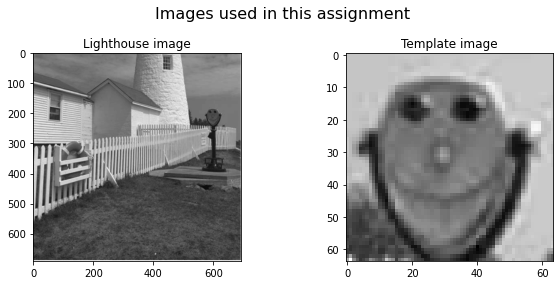

In [3]:
fig = plt.figure(figsize = (9, 4))
fig.suptitle("Images used in this assignment", size = 16)

plt.subplot(1, 2, 1)
plt.imshow(lighthouse, cmap = 'gray')
plt.title("Lighthouse image")

plt.subplot(1, 2, 2)
plt.imshow(template, cmap = 'gray')
plt.title("Template image")

plt.tight_layout()
plt.show()

<a name = '3'></a>
# Question 1 - Edge Detection

## Gradient Edge Detectors<a name = '4'></a>

In [4]:
def pad_for_diff(image):
    M, N = image.shape
    
    padded_image = np.zeros([M + 2, N + 2])
    padded_image[1 : -1, 1 : -1] = image
    
    padded_image[0, 1 : -1] = image[1, : ]
    padded_image[-1, 1 : -1] = image[-2, : ]
    padded_image[1 : -1, 0] = image[:, 1]
    padded_image[1 : -1, -1] = image[:, -2]
    
    padded_image[0, 0] = image[1, 1]
    padded_image[0, -1] = image[1, -2]
    padded_image[-1, 0] = image[-2, 1]
    padded_image[-1, -1] = image[-2, -2]
    
    return padded_image

### Centered 2-D differencing<a name = '5'></a>

In [5]:
def cent_2D_diff(image):
    M, N = image.shape
    
    diff_image_x, diff_image_y = np.zeros([M, N]), np.zeros([M, N])
    padded_image = pad_for_diff(image)
    
    del_x = np.array([-1, 0, 1]) / 2
    del_y = np.array([-1, 0, 1]) / 2
    
    for i in range(M):
        for j in range(N):
            diff_image_x[i, j] = (del_x * padded_image[i + 1, j : j + 3]).sum()
            diff_image_y[i, j] = (del_y * padded_image[i : i + 3, j + 1]).sum()

    return diff_image_x, diff_image_y

### Roberts Operator<a name = '6'></a>

In [6]:
def roberts_diff(image):
    M, N = image.shape
    
    diff_image_x, diff_image_y = np.zeros([M, N]), np.zeros([M, N])
    padded_image = pad_for_diff(image)
    
    del_x = np.array([[-1, 0], [0, 1]]).reshape([2, 2])
    del_y = np.array([[0, -1], [1, 0]]).reshape([2, 2])
    
    for i in range(M):
        for j in range(N):
            diff_image_x[i, j] = (del_x * padded_image[i : i + 2, j : j + 2]).sum()
            diff_image_y[i, j] = (del_y * padded_image[i : i + 2, j : j + 2]).sum()
    
    return diff_image_x, diff_image_y

### Prewitt Operator<a name = '7'></a>

In [7]:
def prewitt_diff(image):
    M, N = image.shape
    
    diff_image_x, diff_image_y = np.zeros([M, N]), np.zeros([M, N])
    padded_image = pad_for_diff(image)
    
    del_x = np.array([[-1, 0, 1] * 3]).reshape([3, 3]) / 3
    del_y = del_x.T
    
    for i in range(M):
        for j in range(N):
            diff_image_x[i, j] = (del_x * padded_image[i : i + 3, j : j + 3]).sum()
            diff_image_y[i, j] = (del_y * padded_image[i : i + 3, j : j + 3]).sum()
    
    return diff_image_x, diff_image_y

### Sobel Operator<a name = '8'></a>

In [8]:
def sobel_diff(image):
    M, N = image.shape
    
    diff_image_x, diff_image_y = np.zeros([M, N]), np.zeros([M, N])
    padded_image = pad_for_diff(image)
    
    del_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]).reshape([3, 3]) / 4
    del_y = del_x.T
    
    for i in range(M):
        for j in range(N):
            diff_image_x[i, j] = (del_x * padded_image[i : i + 3, j : j + 3]).sum()
            diff_image_y[i, j] = (del_y * padded_image[i : i + 3, j : j + 3]).sum()
    
    return diff_image_x, diff_image_y

## Gradient Magnitude Computation<a name = '9'></a>

In [9]:
def M_1(diff_x, diff_y):
    return np.sqrt(diff_x ** 2 + diff_y ** 2)

def M_2(diff_x, diff_y):
    return np.abs(diff_x) + np.abs(diff_y)

def M_3(diff_x, diff_y):
    abs_1 = np.abs(diff_x)
    abs_2 = np.abs(diff_y)
    return np.where(abs_1 > abs_2, abs_1, abs_2)

## Thresholding the Magnitude map<a name = '10'></a>

In [10]:
def choose_threshold(image):
    mean = np.average(image.flatten())
    stddev = np.var(image.flatten()) ** 0.5
    
    return mean + 0.5 * stddev

def return_edge_map(image, diff_operator, diff_magnitude):
    diff_x, diff_y = diff_operator(image)
    diff_mag = diff_magnitude(diff_x, diff_y)
    tau = choose_threshold(diff_mag)
    
    return 1 * (diff_mag > tau)

## Testing on Images<a name = '11'></a>

In [11]:
grad_operators = [cent_2D_diff, roberts_diff, prewitt_diff, sobel_diff]
grad_magnitude = [M_1, M_2, M_3]
edge_maps = []

for grad_op in grad_operators:
    for grad_mag in grad_magnitude:
        edge_map = return_edge_map(lighthouse, grad_op, grad_mag)
        edge_maps.append(edge_map)

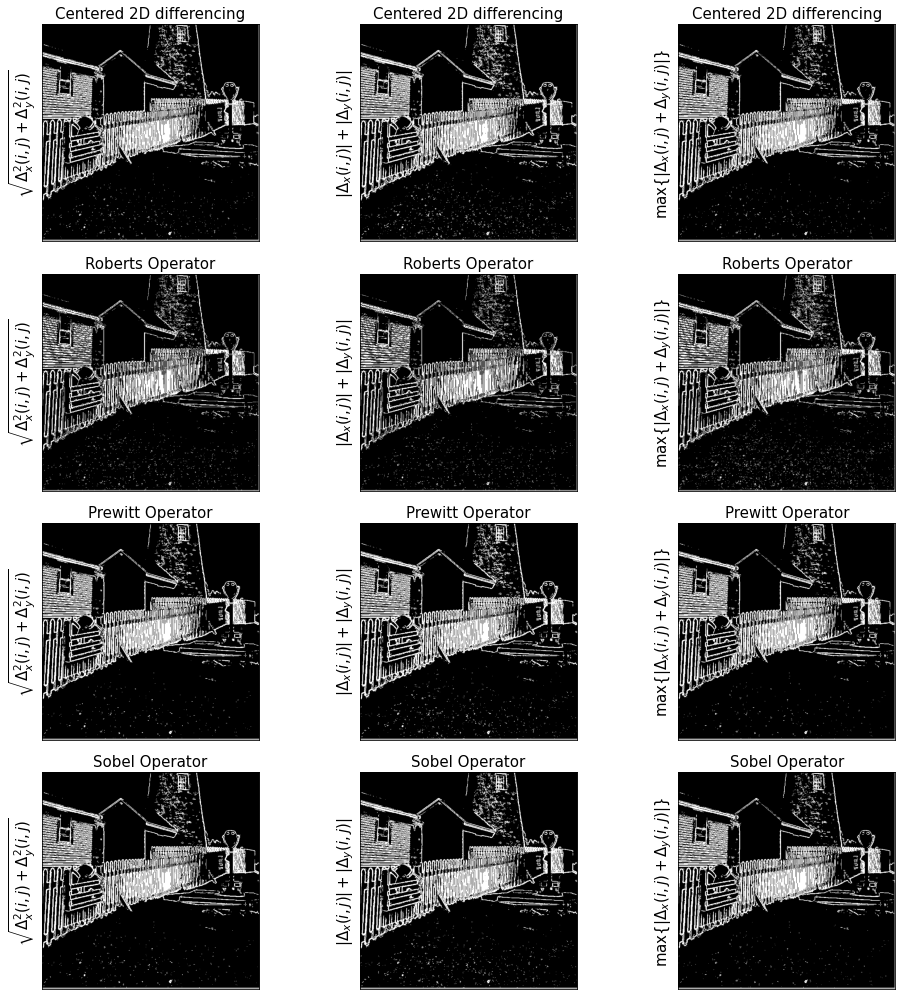

In [12]:
fig = plt.figure(figsize = (14, 14))
grad_op_names = ["Centered 2D differencing", "Roberts Operator", "Prewitt Operator", "Sobel Operator"]
grad_mag_names = [r"$\sqrt{\Delta_x^2(i, j) + \Delta_y^2(i, j)}$", r"$|\Delta_x(i, j)| + |\Delta_y(i, j)|$", 
                  r"max{|$\Delta_x(i, j) + \Delta_y(i, j)$|}"]

for i in range(len(edge_maps)):
    plt.subplot(4, 3, i + 1)
    plt.imshow(edge_maps[i], cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(grad_mag_names[i % 3], size = 15)
    plt.title(grad_op_names[int(i / 3)], size = 15)

fig.tight_layout()
plt.show()

## Laplacian Edge Detectors<a name = '12'></a>

In [13]:
def pad_for_zc(image):
    M, N = image.shape
    
    padded_image = np.zeros([M + 2, N + 2])
    padded_image[1 : -1, 1 : -1] = image
    
    padded_image[0, 1 : -1] = image[0, : ]
    padded_image[-1, 1 : -1] = image[-1, : ]
    padded_image[1 : -1, 0] = image[:, 0]
    padded_image[1 : -1, -1] = image[:, -1]
    
    padded_image[0, 0] = image[0, 0]
    padded_image[0, -1] = image[0, -1]
    padded_image[-1, 0] = image[-1, 0]
    padded_image[-1, -1] = image[-1, -1]
    
    return padded_image

def compute_laplacian(image):
    M, N = image.shape
    
    laplacian_image = np.zeros([M, N])
    padded_image = pad_for_diff(image)
    
    laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]).reshape([3, 3])
    
    for i in range(M):
        for j in range(N):
            laplacian_image[i, j] = (laplacian * padded_image[i : i + 3, j : j + 3]).sum()
    
    return laplacian_image

def detect_zero_crossings(image):
    M, N = image.shape
    edge_map = np.zeros([M + 1, N + 1])
    padded_image = pad_for_zc(image)
    
    for i in range(M):
        for j in range(N):
            if image[i, j] == 0:
                x_b, x_f = padded_image[i + 1, j], padded_image[i + 1, j + 2]
                y_b, y_f = padded_image[i, j + 1], padded_image[i + 2, j + 1]
                
                if (x_b * x_f < 0) or (y_b * y_f < 0):
                    edge_map[i, j] = 1
                
            else:
                x_b, x_f = padded_image[i + 1, j + 1], padded_image[i + 1, j + 2]
                y_b, y_f = padded_image[i + 1, j + 1], padded_image[i + 2, j + 1]
                
                if (x_b * x_f < 0):
                    if x_b > 0:
                        edge_map[i, j] = 1
                    else:
                        edge_map[i, j + 1] = 1
                        
                if (y_b * y_f < 0):
                    if y_b > 0:
                        edge_map[i, j] = 1
                    else:
                        edge_map[i + 1, j] = 1

    return edge_map[ : M, : N]

def laplacian_edge_detector(image):
    image_laplacian = compute_laplacian(image)
    edge_map = detect_zero_crossings(image_laplacian)
    
    return edge_map

In [14]:
laplacian_lighthouse = compute_laplacian(lighthouse)
laplacian_edge_map = laplacian_edge_detector(lighthouse)

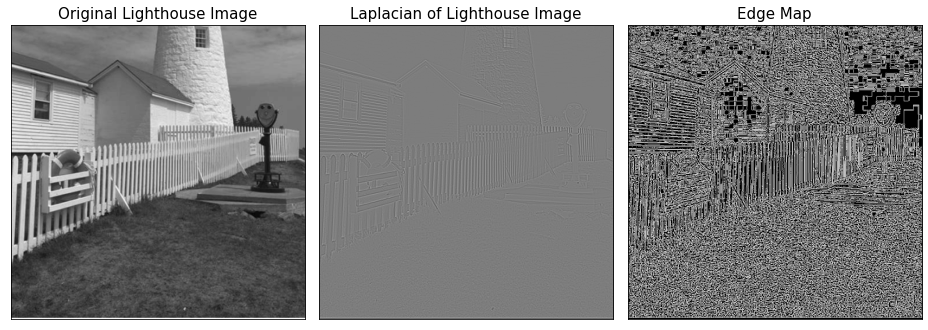

In [15]:
fig = plt.figure(figsize = (13, 8))

plt.subplot(1, 3, 1)
plt.imshow(lighthouse, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Original Lighthouse Image", size = 15)

plt.subplot(1, 3, 2)
plt.imshow(laplacian_lighthouse, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Laplacian of Lighthouse Image", size = 15)

plt.subplot(1, 3, 3)
plt.imshow(laplacian_edge_map, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Edge Map", size = 15)

fig.tight_layout()
plt.show()

## Laplacian of Gaussian (LoG)<a name = '13'></a>

In [16]:
def returnPaddedImage(target_shape, image):
    A, B = image.shape
    N, M = target_shape
    
    padded_image = np.zeros([N, M])
    padded_image[ : A, : B] = image

    return padded_image

def matrixDFT(image):
    M, N = image.shape
    W_N = np.zeros([N, N], dtype = complex)
    
    for i in range(N):
        for j in range(N):
            W_N[i, j] = np.exp(-2j * np.pi * i * j / N)
    
    dft_image = W_N @ image @ W_N
    
    return dft_image

def matrixIDFT(dft_image):
    M, N = dft_image.shape
    W_N = np.zeros([N, N], dtype = complex)
    
    for i in range(N):
        for j in range(N):
            W_N[i, j] = np.exp(2j * np.pi * i * j / N) / N
    
    idft_image = W_N @ dft_image @ W_N
    
    return np.real(idft_image)

def linearConvolutionDFT(image1, image2):
    N1, M1 = image1.shape
    N2, M2 = image2.shape
    
    padded_image1 = returnPaddedImage([N1 + N2 - 1, M1 + M2 - 1], image1)
    padded_image2 = returnPaddedImage([N1 + N2 - 1, M1 + M2 - 1], image2)
    
    dft_1 = matrixDFT(padded_image1)
    dft_2 = matrixDFT(padded_image2)
    prod = dft_1 * dft_2    
    result_image = matrixIDFT(prod)
    
    return result_image

In [17]:
def addAWGN(image, sigma = 10):
    threshold = int(2 ** np.ceil(np.log2(np.max(image.flatten())))) - 1
    noisy_image = image + np.random.normal(loc = 0, scale = sigma, size = image.shape)
    noisy_image[noisy_image > threshold] = threshold
    
    return noisy_image

def LoG_kernel(filter_shape, sigma):
    m, n = filter_shape
    LoG_filter = np.zeros(filter_shape)
    sigma2 = sigma ** 2
    
    for i in range(m):
        for j in range(n):
            tmp = i ** 2 + j ** 2
            LoG_filter[i, j] = (1 - tmp / sigma2) * np.exp(-tmp / (2 * sigma ** 2))
    LoG_filter = LoG_filter - np.average(LoG_filter)
    
    return LoG_filter

def compute_LoG(image, filter_shape, filter_sigma):
    M, N = image.shape
    m, n = filter_shape
    m1, n1 = int((m - 1) / 2), int((n - 1) / 2)
    filter_ = LoG_kernel(filter_shape, filter_sigma)
    
    LoG_image = linearConvolutionDFT(image, filter_)

    return LoG_image[m1 : -m1, n1 : -n1]

def LoG_edge_detector(image, noise_sigma, filter_shape, filter_sigma):
    noisy_image = addAWGN(image, sigma = noise_sigma)
    LoG_image = compute_LoG(noisy_image, filter_shape, filter_sigma)
    edge_map = detect_zero_crossings(LoG_image)
    
    return LoG_image, edge_map

## Testing on different sigma values<a name = '14'></a>

In [18]:
noisy_lighthouse = addAWGN(lighthouse, sigma = 10)
images = []
sigma_test = [5, 7, 9, 10]

for filter_sigma in sigma_test:
    LoG_lighthouse, edge_map = LoG_edge_detector(lighthouse, 10, [11, 11], filter_sigma)
    images.append(noisy_lighthouse)
    images.append(LoG_lighthouse)
    images.append(edge_map)

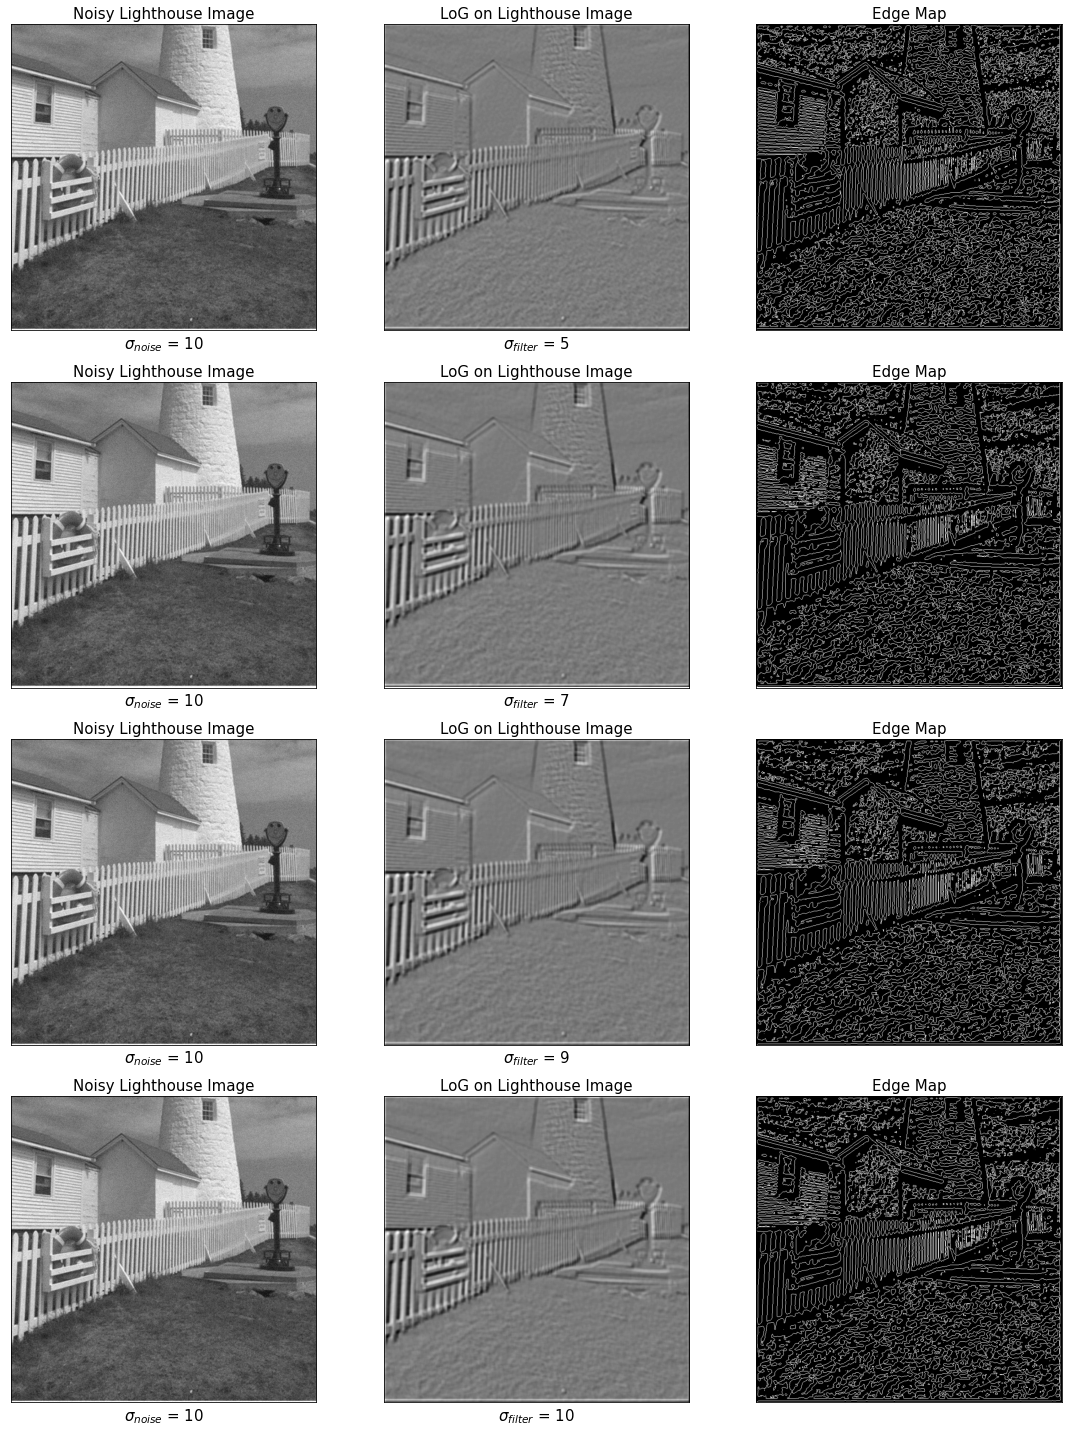

In [19]:
fig = plt.figure(figsize = (16, 20))

titles = ["Noisy Lighthouse Image", "LoG on Lighthouse Image", "Edge Map"]

for i in range(len(images)):    
    plt.subplot(len(sigma_test), 3, i + 1)
    plt.imshow(images[i], cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i % 3], size = 15)
    if i % 3 == 0:
        plt.xlabel(r"$\sigma_{noise}$ = 10", size = 15)
    if i % 3 == 1:
        plt.xlabel(r"$\sigma_{filter}$" + f" = {sigma_test[int(i / 3)]}", size = 15)
        
fig.tight_layout()
plt.show()

From the above images, we can say that LoG filter size of 11x11 with $\sigma_{filter} = 10$ gives the best result. <br>The resultant edge map has a single pixel wide continuous edges. Lot's of edges can be observed in the background portion such as the sky which might be due to the added noise.

## Comparison with Gradient based Techniques<a name = '15'></a>

In [20]:
edge_maps = []
edge_maps.append(return_edge_map(lighthouse, prewitt_diff, M_3))
edge_maps.append(laplacian_edge_detector(lighthouse))
edge_maps.append(LoG_edge_detector(lighthouse, 10, [11, 11], 10)[1])

noisy_lighthouse = addAWGN(lighthouse, 10)
edge_maps.append(return_edge_map(noisy_lighthouse, prewitt_diff, M_3))
edge_maps.append(laplacian_edge_detector(noisy_lighthouse))
edge_maps.append(LoG_edge_detector(noisy_lighthouse, 10, [11, 11], 10)[1])

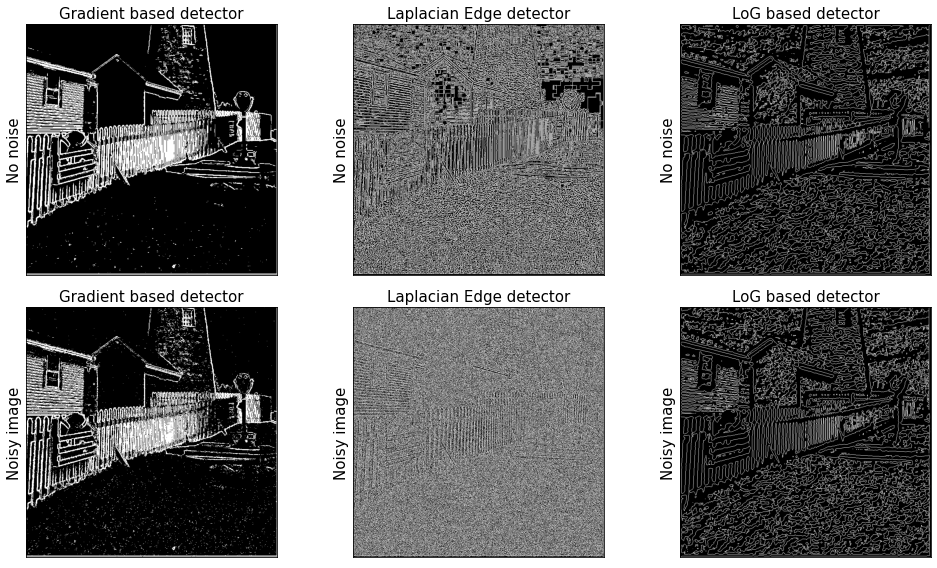

In [21]:
fig = plt.figure(figsize = (14, 8))

method = ["Gradient based detector", "Laplacian Edge detector", "LoG based detector"]
noisy = ["No noise", "Noisy image"]

for i in range(len(edge_maps)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(edge_maps[i], cmap = "gray")
    plt.xticks([])
    plt.yticks([])
    plt.title(method[i % 3], size = 15)
    plt.ylabel(noisy[int(i / 3)], size = 15)

fig.tight_layout()
plt.show()

From the above images, clearly LoG based detector is more robust to noise as compared to Laplacian and Gradient based edge detectors.

# Question 2 - Template Matching<a name = '16'></a>

## Normalized Cross Correlation of Image<a name = '17'></a>

In [22]:
def compute_norm_cross_corr(image, template):
    M, N = image.shape
    m, n = template.shape
    M_new, N_new = M - m + 1, N - n + 1
    
    cross_corr_image = np.zeros([M_new, N_new])
    template_energy = (template ** 2).sum()
    
    for i in range(M_new):
        for j in range(N_new):
            windowed_set = image[i : i + m, j : j + n]
            cross_corr_patch = (template * windowed_set).sum()
            energy_prod = np.sqrt(template_energy * ((windowed_set ** 2).sum()))
            if energy_prod != 0:
                cross_corr_image[i, j] = cross_corr_patch / energy_prod
    
    return cross_corr_image

In [23]:
norm_cross_corr = compute_norm_cross_corr(lighthouse, template)

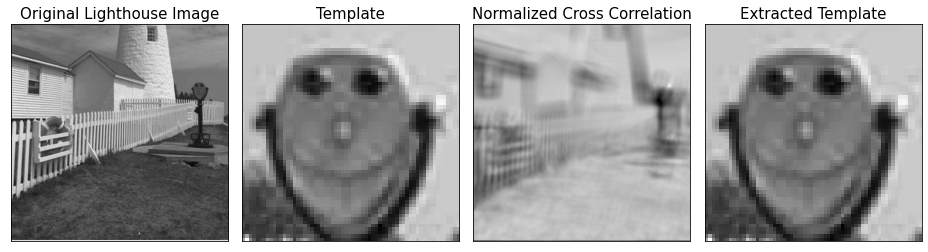

In [24]:
m, n = template.shape
pos_i, pos_j = np.unravel_index(np.argmax(norm_cross_corr, axis = None), norm_cross_corr.shape)

fig = plt.figure(figsize = (13, 8))

plt.subplot(1, 4, 1)
plt.imshow(lighthouse, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Original Lighthouse Image", size = 15)

plt.subplot(1, 4, 2)
plt.imshow(template, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Template", size = 15)

plt.subplot(1, 4, 3)
plt.imshow(norm_cross_corr, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Normalized Cross Correlation", size = 15)

plt.subplot(1, 4, 4)
plt.imshow(lighthouse[pos_i : pos_i + m, pos_j : pos_j + n], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title("Extracted Template", size = 15)

fig.tight_layout()
plt.show()

## Threshold to detect match<a name = '18'></a>

In [25]:
print(f"Maximum of the normalized cross correlation: {np.max(norm_cross_corr)}")

Maximum of the normalized cross correlation: 1.0


For the original lighthouse image and the template (extracted from the image), we can select the threshold to be 1 since it will detect the perfect match. As we introduce noise or distortions in the image such as rotation we must handpick the threshold by looking at the maximum value of Normalised Cross-Correlation matrix.

## Adding Gaussian Noise to Template<a name = '19'></a>

In [26]:
noise_sigma_list = [1, 3, 5, 10]
image_list = []
pos_list = []
max_value = []
m, n = template.shape

for noise_sigma in noise_sigma_list:
    noisy_template = addAWGN(template, noise_sigma)
    image_list.append(noisy_template)
    
    norm_cross_corr = compute_norm_cross_corr(lighthouse, noisy_template)
    image_list.append(norm_cross_corr)
    
    pos_i, pos_j = np.unravel_index(np.argmax(norm_cross_corr, axis = None), norm_cross_corr.shape)
    pos_list.append((pos_i, pos_j))
    
    image_list.append(lighthouse[pos_i : pos_i + m, pos_j : pos_j + n])
    max_value.append(np.max(norm_cross_corr))

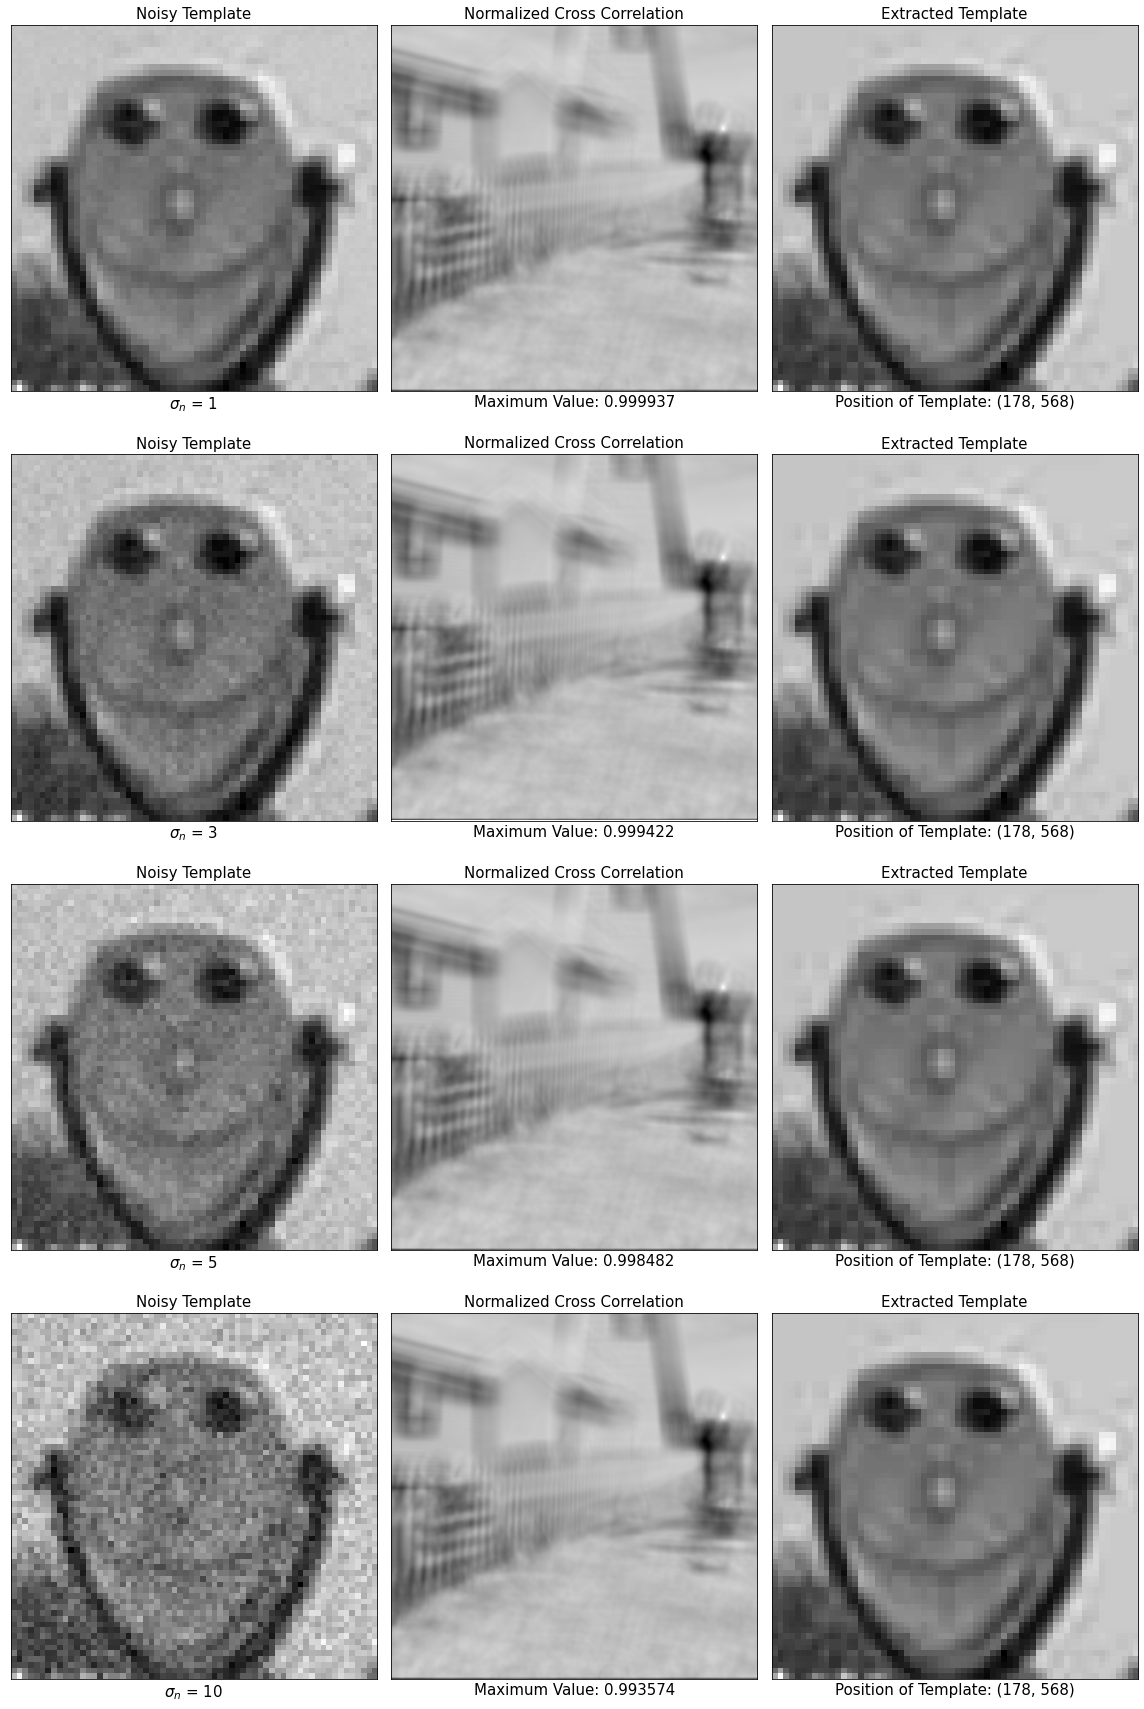

In [27]:
fig = plt.figure(figsize = (16, 24))

titles = ["Noisy Template", "Normalized Cross Correlation", "Extracted Template"]

for i in range(len(image_list)):    
    plt.subplot(len(noise_sigma_list), 3, i + 1)
    plt.imshow(image_list[i], cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i % 3], size = 15)
    if i % 3 == 0:
        plt.xlabel(r"$\sigma_n$" + f" = {noise_sigma_list[int(i / 3)]}", size = 15)
    if i % 3 == 1:
        plt.xlabel(f"Maximum Value: {np.around(max_value[int(i / 3)], 6)}", size = 15)
    if i % 3 == 2:
        plt.xlabel(f"Position of Template: {pos_list[int(i / 3)]}", size = 15)
        
fig.tight_layout()
plt.show()

As observed from the above images, the maximum value of the normalized cross correlation reduces as the variance of the added AWGN noise increases. But the position of the best match does not change which signifies that this method is robust to noise. 

## Rotation of Image<a name = '20'></a>

In [28]:
def compute_rotation_matrix(angle):
    angle_rad = np.pi * angle / 180
    c = np.cos(angle_rad)
    s = np.sin(angle_rad)
    return np.array([[c, s], [-s, c]]).reshape([2, 2])

def interpolate_image(image, status_image):
    i_list, j_list = np.where(status_image == 0)
    interpolated_image = image
    
    for k in range(len(i_list)):
        i, j = i_list[k], j_list[k]
        interpolated_image[i, j] = (image[i, j + 1] + image[i, j - 1] + image[i + 1, j] + image[i - 1, j]) / 4
    
    return interpolated_image

def rotated_and_interpolated_image(image, angle):
    M, N = image.shape
    M_2, N_2 = (M - 1) / 2, (N - 1) / 2
    angle_rad = np.pi * angle / 180
    
    M_new = int(np.ceil(M * (np.sin(angle_rad) + np.cos(angle_rad))))
    N_new = int(np.ceil(N * (np.sin(angle_rad) + np.cos(angle_rad))))
    M_new_2 = int((M_new - 1) / 2)
    N_new_2 = int((N_new - 1) / 2)
    
    rotation_matrix = compute_rotation_matrix(angle)
    rotated_image = np.zeros([M_new, N_new])
    status_image = np.zeros([M_new, N_new])
    
    for i in range(M):
        for j in range(N):
            i1, j1 = i - M_2, j - N_2
            i_new, j_new = (rotation_matrix @ np.array([[i1], [j1]])) + np.array([[M_new_2], [N_new_2]])
            rotated_image[int(i_new), int(j_new)] = lighthouse[i, j]
            status_image[int(i_new), int(j_new)] = 1
    
    status_image[0,:] = 1
    status_image[-1,:] = 1
    status_image[:,0] = 1
    status_image[:,-1] = 1
    
    interpolated_image = interpolate_image(rotated_image, status_image)
    
    return interpolated_image

In [29]:
M, N = lighthouse.shape
m, n = template.shape

image_list = []
pos_list = []
max_value = []
angle_in_degrees = [5, 10, 15]

for angle in angle_in_degrees:
    interpolated_image = rotated_and_interpolated_image(lighthouse, angle)
    image_list.append(interpolated_image)

    norm_cross_corr = compute_norm_cross_corr(interpolated_image, template)
    image_list.append(norm_cross_corr)

    pos_i, pos_j = np.unravel_index(np.argmax(norm_cross_corr, axis = None), norm_cross_corr.shape)
    pos_list.append((pos_i, pos_j))
    
    image_list.append(interpolated_image[pos_i : pos_i + m, pos_j : pos_j + n])
    
    max_value.append(np.max(norm_cross_corr))    

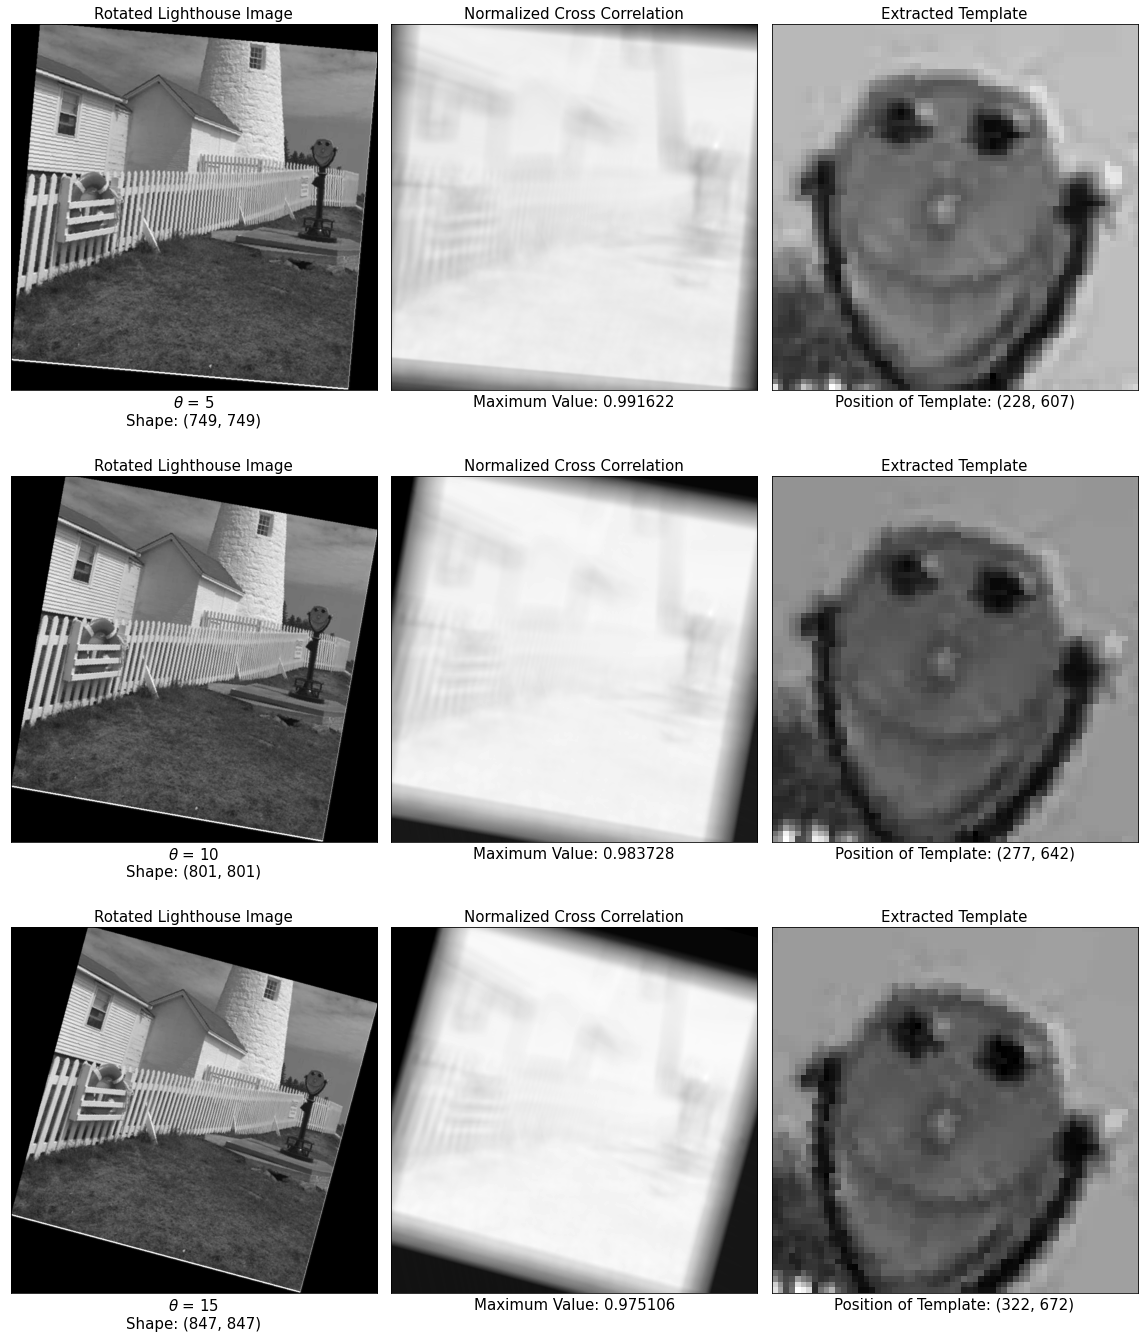

In [30]:
fig = plt.figure(figsize = (16, 19))

titles = ["Rotated Lighthouse Image", "Normalized Cross Correlation", "Extracted Template"]

for i in range(len(image_list)):    
    plt.subplot(len(angle_in_degrees), 3, i + 1)
    plt.imshow(image_list[i], cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i % 3], size = 15)
    if i % 3 == 0:
        plt.xlabel(r"$\theta$"+f" = {angle_in_degrees[int(i / 3)]}"+f"\nShape: {image_list[i].shape}", size = 15)
    if i % 3 == 1:
        plt.xlabel(f"Maximum Value: {np.around(max_value[int(i / 3)], 6)}", size = 15)
    if i % 3 == 2:
        plt.xlabel(f"Position of Template: {pos_list[int(i / 3)]}", size = 15)
        
fig.tight_layout()
plt.show()

As the rotation angle increases, the maximum value of normalized cross correlation reduces and hence the threshold reduces. This indicates that template matching using normalized cross correlation is not robust to rotation.